<a href="https://colab.research.google.com/github/Md7tz/Machine-learning-notebooks/blob/master/Multiclass_classification_using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass image classification

## 1. Import the data

In [2]:
import zipfile

!wget -N https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2021-10-17 17:44:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 64.233.166.128, 66.102.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   133MB/s    in 4.4s    

2021-10-17 17:44:22 (113 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import os

# Walk through the directory and list the number of file
for dirpath, dirnames, filenames in os.walk('./10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in './10_food_classes_all_data'.
There are 10 directories and 0 images in './10_food_classes_all_data/train'.
There are 0 directories and 750 images in './10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in './10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in './10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in './10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in './10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in './10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in './10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in './10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in './10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in './10_food_classes_all

In [4]:
!ls -la 10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 Oct 17 17:44 .
drwxr-xr-x  1 root root 4096 Oct 17 17:44 ..
drwxr-xr-x 12 root root 4096 Oct 17 17:44 test
drwxr-xr-x 12 root root 4096 Oct 17 17:44 train


In [5]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


### Helper functions

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  images_dir = os.path.join(target_dir, target_class)
  img_name = random.choice(os.listdir(images_dir))
  img = mpimg.imread(os.path.join(images_dir, img_name))
  plt.imshow(img)
  plt.title(' '.join(target_class.split('_')).capitalize())
  plt.axis(False);
  print(f"Name: {img_name}\nShape: {img.shape}")

  return img

In [42]:
def plot_loss_curves(history):
  """
  Return Separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(loss))

  plt.figure(figsize=(7, 10))
  plt.subplot(2, 1, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="validation_loss")
  plt.title("loss")
  plt.legend()

  plt.subplot(2, 1, 2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="validation_accuracy")
  plt.title("accuracy")
  plt.legend();

Name: 1343209.jpg
Shape: (471, 512, 3)


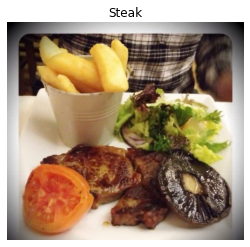

In [8]:
# Visualize
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data

In [49]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             shear_range=0.1,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [50]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                         target_size=(224, 224),
                                                         class_mode="categorical",
                                                         batch_size=32,
                                                         shuffle=True)

train_data = train_datagen.flow_from_directory(train_dir,
                                             target_size=(224, 224),
                                             class_mode="categorical",
                                             batch_size=32,
                                             shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="categorical",
                                             batch_size=32,
                                             shuffle=True)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (adapted from cnn explainer website)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [13]:
EPOCHS = 5

# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         input_shape=(224, 224, 3)),
  Activation(tf.nn.relu),
  Conv2D(10, 3),
  Activation(tf.nn.relu),
  MaxPool2D(),
  Conv2D(10, 3),
  Activation(tf.nn.relu),
  Conv2D(10, 3),
  Activation(tf.nn.relu),
  MaxPool2D(),
  Flatten(),
  Dense(len(class_names)),
  Activation(tf.nn.softmax)
])

# Compile the model
model_1.compile(loss=CategoricalCrossentropy(),
                optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=EPOCHS,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 234ms/step - loss: 2.1359 - accuracy: 0.2181 - val_loss: 2.0101 - val_accuracy: 0.2736
Epoch 2/5
235/235 [==============================] - 55s 233ms/step - loss: 1.8456 - accuracy: 0.3647 - val_loss: 1.9616 - val_accuracy: 0.2992
Epoch 3/5
235/235 [==============================] - 54s 231ms/step - loss: 1.5016 - accuracy: 0.4913 - val_loss: 1.9475 - val_accuracy: 0.3460
Epoch 4/5
235/235 [==============================] - 54s 231ms/step - loss: 0.9411 - accuracy: 0.6925 - val_loss: 2.3804 - val_accuracy: 0.3200
Epoch 5/5
235/235 [==============================] - 55s 232ms/step - loss: 0.4081 - accuracy: 0.8761 - val_loss: 3.1241 - val_accuracy: 0.2944


### Evaluate the model

In [15]:
model_1.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 3.1241 - accuracy: 0.2944


[3.1240792274475098, 0.29440000653266907]

Check the model loss curves

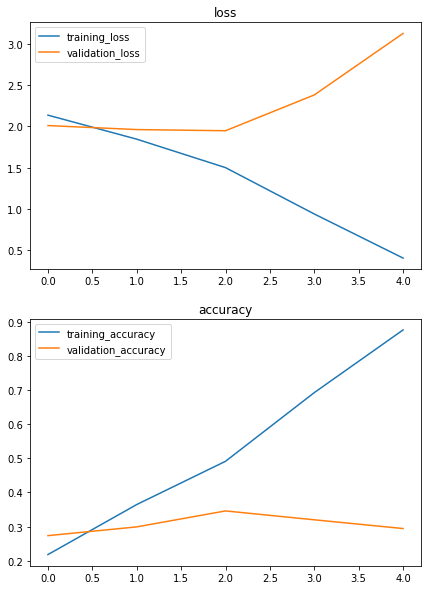

In [43]:
plot_loss_curves(history_1)

### Adjust hyperparamaters to reduce overfitting

In [44]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
activation_5 (Activation)    (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
activation_6 (Activation)    (None, 220, 220, 10)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
activation_7 (Activation)    (None, 108, 108, 10)     

In [45]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(tf.nn.relu),
  MaxPool2D(),
  Conv2D(10, 3),
  Activation(tf.nn.relu),
  MaxPool2D(),
  Flatten(),
  Dense(len(class_names)),
  Activation(tf.nn.softmax)
])

# Compile the model
model_2.compile(loss=CategoricalCrossentropy(),
                optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=EPOCHS,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 211ms/step - loss: 2.1129 - accuracy: 0.2479 - val_loss: 1.9576 - val_accuracy: 0.3204
Epoch 2/5
235/235 [==============================] - 50s 213ms/step - loss: 1.7991 - accuracy: 0.3920 - val_loss: 1.8635 - val_accuracy: 0.3672
Epoch 3/5
235/235 [==============================] - 51s 215ms/step - loss: 1.4833 - accuracy: 0.5041 - val_loss: 1.8495 - val_accuracy: 0.3676
Epoch 4/5
235/235 [==============================] - 50s 214ms/step - loss: 1.0669 - accuracy: 0.6605 - val_loss: 2.1059 - val_accuracy: 0.3488
Epoch 5/5
235/235 [==============================] - 49s 211ms/step - loss: 0.6615 - accuracy: 0.8017 - val_loss: 2.3660 - val_accuracy: 0.3184


In [46]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
activation_10 (Activation)   (None, 222, 222, 10)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
activation_11 (Activation)   (None, 109, 109, 10)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 29160)            

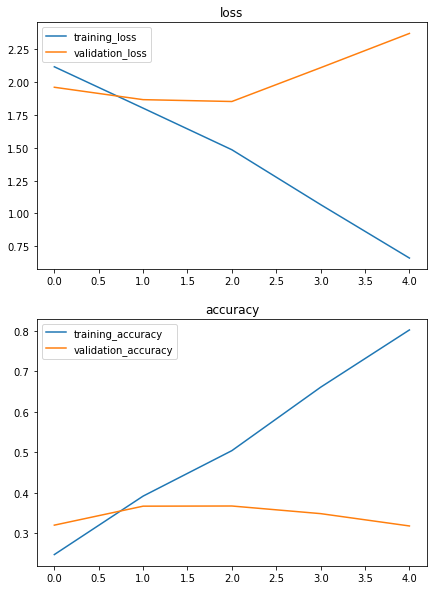

In [48]:
plot_loss_curves(history_2)

### Trying to reduce overfitting with augmented training data

In [51]:
model_3 = tf.keras.models.clone_model(model_1)

# Compile the cloned model
model_3.compile(loss=CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [52]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
activation_5 (Activation)    (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
activation_6 (Activation)    (None, 220, 220, 10)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
activation_7 (Activation)    (None, 108, 108, 10)     

In [53]:
# Fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=EPOCHS,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 136s 575ms/step - loss: 2.2309 - accuracy: 0.1595 - val_loss: 2.0799 - val_accuracy: 0.2108
Epoch 2/5
235/235 [==============================] - 134s 571ms/step - loss: 2.1063 - accuracy: 0.2363 - val_loss: 1.9618 - val_accuracy: 0.2940
Epoch 3/5
235/235 [==============================] - 134s 572ms/step - loss: 2.0410 - accuracy: 0.2731 - val_loss: 1.9136 - val_accuracy: 0.3296
Epoch 4/5
235/235 [==============================] - 134s 570ms/step - loss: 2.0104 - accuracy: 0.2935 - val_loss: 1.9012 - val_accuracy: 0.3432
Epoch 5/5
235/235 [==============================] - 134s 570ms/step - loss: 1.9616 - accuracy: 0.3135 - val_loss: 1.8314 - val_accuracy: 0.3612


In [56]:
model_1.evaluate(test_data), model_2.evaluate(test_data), model_3.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.8314 - accuracy: 0.3612


([3.1240804195404053, 0.29440000653266907],
 [2.3659753799438477, 0.31839999556541443],
 [1.8313606977462769, 0.3612000048160553])

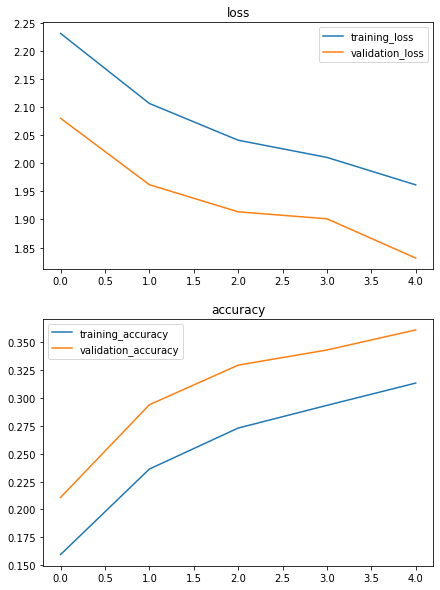

In [55]:
# Check loss curves for augmented data
plot_loss_curves(history_3)